<a href="https://colab.research.google.com/github/PCBZ/CS6140/blob/main/HW4/HW4_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training & Testing Errors:
 Number of Trees  Train Error  Test Error
               1     5.147551    4.927671
               2     4.472400    5.689096
               3     4.168121    5.473706
               4     3.622062    6.055120
               5     3.324087    5.905884
               6     3.163476    5.326139
               7     3.010743    5.327493
               8     2.856376    5.243235
               9     2.738441    5.209397
              10     2.636926    5.204623


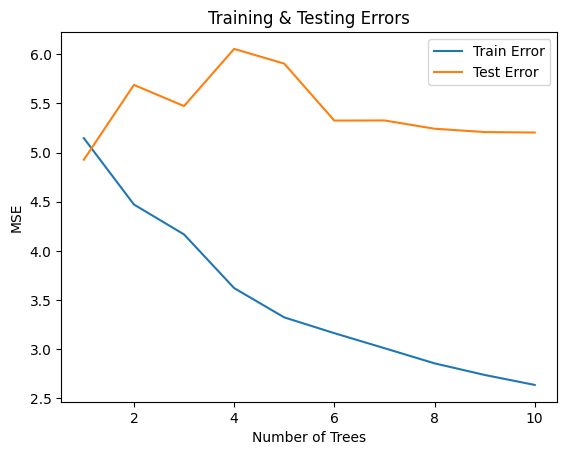

Train MSE: 2.636926321150102
Test MSE: 5.204622610181216
Train R2: 0.9227352495746932
Test R2: 0.35114769900979304


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score

class GradientBoostingRegressor:
    """
    Gradient Boosting Regressor.

    Parameters
    ----------
    n_estimators : int
        The number of trees in the ensemble.
    learning_rate : float
        The learning rate shrinks the contribution of each tree by `learning_rate`.
    max_depth : int
        The maximum depth of each tree.
    """
    def __init__(self, n_estimators=10, learning_rate=1.0, max_depth=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth

        self.trees = []

    def fit(self, X, y):
        """
        Fit the Gradient Boosting Regressor to the training data.
        """
        self.trees = []
        # Initialize residuals
        residuals = y.copy()

        for i in range(self.n_estimators):
            # Train each tree
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)

            # Get current prediction
            current_prediction = tree.predict(X)

            # Update residuals
            residuals = residuals - self.learning_rate * current_prediction

    def predict(self, X):
        """
        Predict the target values for the given input samples.
        """
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

    def get_staged_error(self, X, y):
        """
        Compute the staged error for each tree in the ensemble.
        """
        predictions = np.zeros(X.shape[0])
        staged_errors = []
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
            staged_errors.append(np.sqrt(np.mean((y - predictions) ** 2)))
        return staged_errors

def fetch_housing_data():
    """Fetch Housing dataset"""
    # URLs
    base_url = "https://www.khoury.northeastern.edu/home/vip/teach/MLcourse/data/housing_"

    # Feature names
    features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

    # Load data directly with pandas
    train_data = pd.read_csv(f"{base_url}train.txt", sep="\s+", header=None, names=features)
    test_data = pd.read_csv(f"{base_url}test.txt", sep="\s+", header=None, names=features)

    # Split features and targets
    X_train = train_data.iloc[:, :-1].values
    y_train = train_data.iloc[:, -1].values
    X_test = test_data.iloc[:, :-1].values
    y_test = test_data.iloc[:, -1].values

    return X_train, y_train, X_test, y_test, features[:-1]

def plot_staged_error(train_errors, test_errors):
    """Plot staged errors"""
    stages = range(1, len(train_errors) + 1)

    plt.plot(stages, train_errors, label="Train Error")
    plt.plot(stages, test_errors, label="Test Error")
    plt.xlabel("Number of Trees")
    plt.ylabel("MSE")
    plt.title("Training & Testing Errors")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Fetch data set
    X_train, y_train, X_test, y_test, _ = fetch_housing_data()

    # Create a model and fit
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors = model.get_staged_error(X_train, y_train)
    test_errors = model.get_staged_error(X_test, y_test)

    df = pd.DataFrame({
        "Number of Trees": range(1, len(train_errors) + 1),
        "Train Error": train_errors,
        "Test Error": test_errors
    })

    print("Training & Testing Errors:")
    print(df.to_string(index=False))

    plot_staged_error(train_errors, test_errors)

    print("Train MSE:", root_mean_squared_error(y_train, y_train_pred))
    print("Test MSE:", root_mean_squared_error(y_test, y_test_pred))

    print("Train R2:", r2_score(y_train, y_train_pred))
    print("Test R2:", r2_score(y_test, y_test_pred))



